In [ ]:
!pip install statsmodels==0.14.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 86.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 38.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
!pip install openpyxl
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 27.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
admission_dat = pd.read_csv('admit.csv')
admission_dat.drop(columns='Unnamed: 0')
admission_dat.describe()

,Unnamed: 0,HDI_F,HDI_M,AVG_HDI,gini
count,8034.000000,7908.000000,7908.000000,7908.000000,723.000000
mean,4017.857356,0.899277,0.897791,0.898534,38.744675
std,2321.455949,0.069931,0.085821,0.077609,7.436290
min,0.000000,0.512008,0.472013,0.492010,25.600000
25%,2008.250000,0.923405,0.927693,0.925549,34.200000
50%,4016.500000,0.923405,0.927693,0.925549,36.800000
75%,6024.750000,0.923405,0.927693,0.925549,44.800000
max,10114.000000,0.977383,0.949369,0.963376,63.000000


In [ ]:
admission_dat.dropna(subset = ["Final Read Dec", "Term","Sex","Country"], inplace = False)
admission_dat.describe()

,Unnamed: 0,HDI_F,HDI_M,AVG_HDI,gini
count,8034.000000,7908.000000,7908.000000,7908.000000,723.000000
mean,4017.857356,0.899277,0.897791,0.898534,38.744675
std,2321.455949,0.069931,0.085821,0.077609,7.436290
min,0.000000,0.512008,0.472013,0.492010,25.600000
25%,2008.250000,0.923405,0.927693,0.925549,34.200000
50%,4016.500000,0.923405,0.927693,0.925549,36.800000
75%,6024.750000,0.923405,0.927693,0.925549,44.800000
max,10114.000000,0.977383,0.949369,0.963376,63.000000


Data Cleaning

In [ ]:
# Categorize the 'Country' column into 'US' and 'non-US'
admission_dat['Country_Categorized'] = admission_dat['Country'].apply(lambda x: 'US' if x == 'United States' else 'non-US')


In [ ]:
# renaming the "Final Read Dec" to 'Decision'
admission_dat = admission_dat.rename(columns={'Final Read Dec': 'Decision'})
admission_dat.describe()

,Unnamed: 0,HDI_F,HDI_M,AVG_HDI,gini
count,8034.000000,7908.000000,7908.000000,7908.000000,723.000000
mean,4017.857356,0.899277,0.897791,0.898534,38.744675
std,2321.455949,0.069931,0.085821,0.077609,7.436290
min,0.000000,0.512008,0.472013,0.492010,25.600000
25%,2008.250000,0.923405,0.927693,0.925549,34.200000
50%,4016.500000,0.923405,0.927693,0.925549,36.800000
75%,6024.750000,0.923405,0.927693,0.925549,44.800000
max,10114.000000,0.977383,0.949369,0.963376,63.000000


# Research Question: Who has more chance of admission: US Applicants or International?

EDA

In [ ]:
# Count of applicants by region
acceptance_count_region = admission_dat['Region'].value_counts()
acceptance_count_region

Region
North America    6851
Asia              597
South America     183
Europe            175
Other             138
Africa             88
Oceania             2
Name: count, dtype: int64

In [ ]:
# Acceptance rate for local vs non-local
accepted_count = admission_dat[admission_dat['Decision'] == 'Admit'].groupby('Applicant_Type').size()
total_count = admission_dat.groupby('Applicant_Type').size()
acceptance_rate = (accepted_count / total_count) * 100
acceptance_rate

Applicant_Type
Local        79.934456
Non-local    64.950795
dtype: float64

In [ ]:
# Acceptance rate for each region
accepted_count_region = admission_dat[admission_dat['Decision'] == 'Admit'].groupby('Region').size()
total_count_region = admission_dat.groupby('Region').size()
acceptance_rate_region = (accepted_count_region / total_count_region) * 100
acceptance_rate_region 

Region
Africa           55.681818
Asia             54.773869
Europe           77.714286
North America    79.944534
Oceania          50.000000
Other            76.086957
South America    70.491803
dtype: float64

In [ ]:
# Total acceptance rate 
overall_acceptance_rate = (admission_dat['Decision'] == 'Admit').mean()
print(overall_acceptance_rate *100)

77.47074931540952


In [ ]:
unique_terms = admission_dat['Term'].unique()
unique_terms

array(['Fall 2023', 'Fall 2024', 'Spring 2024', 'Fall 2025'], dtype=object)

In [ ]:
acceptance_rate_Fall2023 = (admission_dat['Decision'] == 'Admit') & (admission_dat['Term'] == 'Fall 2023')
acceptance_rate_Fall2023 = acceptance_rate_Fall2023.mean()

acceptance_rate_Fall2024 = (admission_dat['Decision'] == 'Admit') & (admission_dat['Term'] == 'Fall 2024')
acceptance_rate_Fall2024 = acceptance_rate_Fall2024.mean()

acceptance_rate_Spring2024 =(admission_dat['Decision'] == 'Admit') & (admission_dat['Term'] == 'Spring2024')
acceptance_rate_Spring2024 = acceptance_rate_Spring2024.mean()

acceptance_rate_Fall2025 = (admission_dat['Decision'] == 'Admit') & (admission_dat['Term'] == 'Fall2025')
acceptance_rate_Fall2025 = acceptance_rate_Fall2025.mean()

# did not yield any results

Boxplots

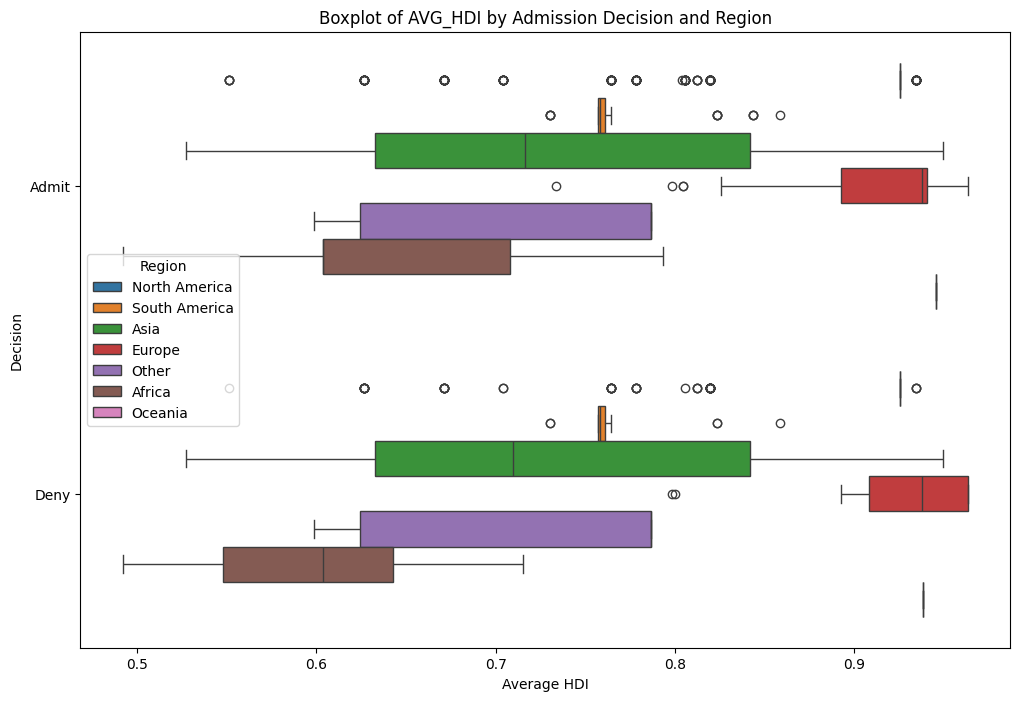

In [ ]:
plt.figure(figsize=(12, 8))  
sns.boxplot(x = 'AVG_HDI', y = 'Decision', hue= 'Region', data = admission_dat)
plt.title('Boxplot of AVG_HDI by Admission Decision and Region')
plt.xlabel('Average HDI') 
plt.ylabel('Decision')  

plt.show()

Text(0, 0.5, 'Admission Decision')

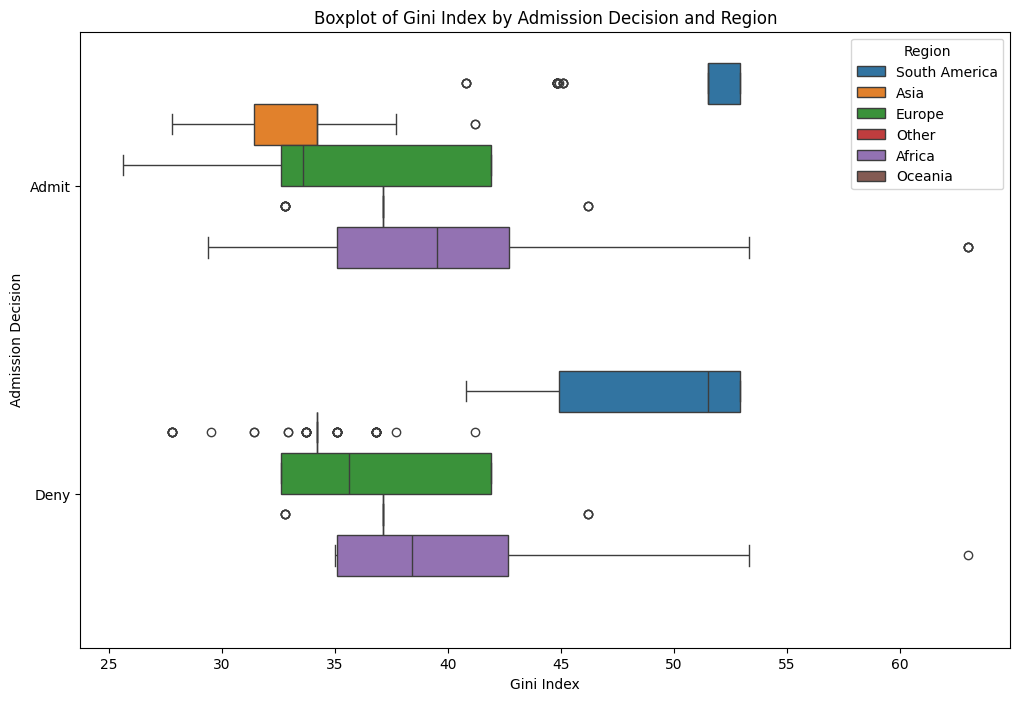

In [ ]:
# Subset the data to exclude North America
international_data = admission_dat.loc[admission_dat['Region'] != 'North America']

plt.figure(figsize=(12, 8))  
sns.boxplot(x = 'gini', y = 'Decision', hue= 'Region', data = international_data)
plt.title('Boxplot of Gini Index by Admission Decision and Region')
plt.xlabel('Gini Index') 
plt.ylabel('Admission Decision')

Testing for significance 

In [ ]:
# Create a contingency table of counts of admitted vs not admitted for each region
contingency_table = pd.crosstab(admission_dat['Region'], admission_dat['Decision'])
contingency_table

# Perform the chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
chi2, p_value  # the differences in acceptance rates across regions are statistically significant!

(230.29358284622438, 6.628274816613802e-47)

Logistic Regression

In [ ]:
admission_dat['Admit_Binary'] = (admission_dat['Decision'] == 'Admit').astype(int)

# Build and fit the logistic regression model using North America as the reference category
model = smf.logit('Admit_Binary ~ C(Region, Treatment(reference="North America"))', data=admission_dat).fit()
model.summary()
# look further Asia, Africa, South America as they are stat.significant!

Optimization terminated successfully.
         Current function value: 0.521058
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Admit_Binary   No. Observations:                 8034
Model:                          Logit   Df Residuals:                     8027
Method:                           MLE   Df Model:                            6
Date:                Fri, 03 May 2024   Pseudo R-squ.:                 0.02337
Time:                        15:02:06   Log-Likelihood:                -4186.2
converged:                       True   LL-Null:                       -4286.3
Covariance Type:            nonrobust   LLR p-value:                 1.616e-40
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            1.3828      0.030     45.831      0.000       1.324       1.442
C(Region, Treatment(reference="North America"))[T.Africa]           -1.1546      0.217     -5.328      0.000      -1.579      -0.730
C(Region, Treatment(reference="North America"))[T.Asia]             -1.1913      0.088    -13.601      0.000      -1.363      -1.020
C(Region, Treatment(reference="North America"))[T.Europe]           -0.1337      0.184     -0.726      0.468      -0.495       0.227
C(Region, Treatment(reference="North America"))[T.Oceania]          -1.3828      1.415     -0.978      0.328      -4.155       1.390
C(Region, Treatment(reference="North America"))[T.Other]            -0.2254      0.202     -1.117      0.264      -0.621       0.170
C(Region, Treatment(reference="North America"))[T.South America]    -0.5120      0.165     -3.106      0.002      -0.835      -0.189
====================================================================================================================================
"""

In [ ]:
coefficients = model.params
odds_ratios = coefficients.apply(np.exp)

# Display the results
print("Log Odds:\n", coefficients)
print("\nOdds Ratios:\n", odds_ratios)

Log Odds:
 Intercept                                                           1.382831
C(Region, Treatment(reference="North America"))[T.Africa]          -1.154573
C(Region, Treatment(reference="North America"))[T.Asia]            -1.191293
C(Region, Treatment(reference="North America"))[T.Europe]          -0.133738
C(Region, Treatment(reference="North America"))[T.Oceania]         -1.382831
C(Region, Treatment(reference="North America"))[T.Other]           -0.225379
C(Region, Treatment(reference="North America"))[T.South America]   -0.512003
dtype: float64

Odds Ratios:
 Intercept                                                           3.986172
C(Region, Treatment(reference="North America"))[T.Africa]           0.315192
C(Region, Treatment(reference="North America"))[T.Asia]             0.303828
C(Region, Treatment(reference="North America"))[T.Europe]           0.874819
C(Region, Treatment(reference="North America"))[T.Oceania]          0.250867
C(Region, Treatment(reference="Nort

In [ ]:
acceptance_rate = {'Non-local': 0.64950795}

admission_dat['AVG_HDI'] = pd.to_numeric(admission_dat['AVG_HDI'], errors='coerce')

repeated_series = pd.Series(np.full(len(admission_dat), acceptance_rate['Non-local']))

chnl = admission_dat['AVG_HDI'].corr(repeated_series)
chnl

-3.8681868145329605e-15

In [ ]:
regions_of_interest = ['Asia', 'Africa', 'South America']
aas_data = admission_dat[admission_dat['Region'].isin(regions_of_interest)]

# Descriptive statistics for HDI
hdi_stats = aas_data.groupby('Region')['AVG_HDI'].describe()
hdi_stats # SA has the highest average mean HDI value !
hdi_stats

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Africa,87.0,0.619454,0.076304,0.492010,0.550592,0.603575,0.694914,0.793237
Asia,562.0,0.739583,0.121963,0.527211,0.632813,0.714123,0.841766,0.949701
South America,154.0,0.763382,0.021252,0.730055,0.757131,0.758129,0.760804,0.858394


In [ ]:
# Descriptive statistics for GINI
gini_stats = aas_data.groupby('Region')['gini'].describe()
gini_stats # SA has the highest average GINI value  
gini_stats

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Africa,42.0,41.697619,9.200437,29.4,35.1,39.5,42.7,63.0
Asia,266.0,33.478571,2.678501,27.8,33.7,34.2,34.2,41.2
South America,132.0,50.222727,3.723201,40.8,45.1,51.5,52.9,52.9


In [ ]:
# Exploring the correlation between AVG_HDI and GINI by admission odds 
hdi_correlation = admission_dat['AVG_HDI'].corr(admission_dat['Decision'] == 'Admit')
gini_correlation = admission_dat['gini'].corr(admission_dat['Decision'] == 'Admit')
print(hdi_correlation, gini_correlation)

0.14573985651011243 0.039762476773338544


In [ ]:
# AVG_HDI and GINI values by region
hdi_africa = admission_dat[admission_dat['Region'] == 'Africa']['AVG_HDI']
hdi_asia = admission_dat[admission_dat['Region'] == 'Asia']['AVG_HDI']
hdi_south_america = admission_dat[admission_dat['Region'] == 'South America']['AVG_HDI']

gini_africa = admission_dat[admission_dat['Region'] == 'Africa']['gini']
gini_asia = admission_dat[admission_dat['Region'] == 'Asia']['gini']
gini_south_america = admission_dat[admission_dat['Region'] == 'South America']['gini']

# One-way ANOVA for AVG_HDI across the three regions
f_statistic_hdi, p_value_hdi = f_oneway(hdi_africa.dropna(), hdi_asia.dropna(), hdi_south_america.dropna())

# One-way ANOVA for gini across the three regions
f_statistic_gini, p_value_gini = f_oneway(gini_africa.dropna(), gini_asia.dropna(), gini_south_america.dropna())

(f_statistic_hdi, p_value_hdi), (f_statistic_gini, p_value_gini)

((57.674208027624424, 3.994119485984695e-24),
 (760.1042900132518, 5.2781926090818565e-143))

In [ ]:
# Filter data for observations from the 'South America' region
south_america_data2 = admission_dat[admission_dat['Region'] == 'South America']

# Drop NaN values from 'gini' and 'Admit_Binary' columns
south_america_data2 = south_america_data2.dropna(subset=['gini', 'Admit_Binary'])

total_admissions = len(south_america_data2)
total_acceptances = south_america_data2['Admit_Binary'].sum()
acceptance_rateS = total_acceptances / total_admissions
spearman_corr, spearman_p_value = stats.spearmanr(south_america_data2['gini'], south_america_data2['Admit_Binary'])

print("Spearman's rank correlation coefficient:", spearman_corr)
print("P-value:", spearman_p_value)

Spearman's rank correlation coefficient: 0.0937047697286228
P-value: 0.2852050341937689


# Research Question: Does applying early for International Students matter for two genders?

In [ ]:
admission_dat2 = pd.read_csv("Admissions_Added_Dat.csv")
admission_dat2 = admission_dat2.dropna()

admission_dat2.head()
codes = admission_dat2["Admit Code"].unique()
codes

array(['First-Year Domestic', 'Early Decision Domestic',
       'Early Decision II Domestic', 'First-Year International',
       'Early Decision II International', 'Early Decision International'],
      dtype=object)

In [ ]:
international = admission_dat2.loc[(admission_dat2['Admit Code'] == 'Early Decision II International' ) | (admission_dat2['Admit Code'] == 'Early Decision International')]
international.head()

,Unnamed: 0,Admit Code,Final Read Dec,Term,Sex,Country,City,School,Region,IncomeGroup,HDI,gini
83,83,Early Decision II International,Admit,Fall 2023,M,El Salvador,San Salvador,Escuela Americana El Salvadore (American Schoo...,North America,Upper middle income,66280863085.3055,38.8
223,223,Early Decision II International,Admit,Fall 2023,M,China,Ningbo,Ningbo Foreign Langugage School,Other,Upper middle income,30012338566243.8,37.1
242,242,Early Decision International,Admit,Fall 2023,M,Switzerland,Vaud,Institut Le Rosey,Europe,High income,780283122333.203,33.1
329,329,Early Decision International,Admit,Fall 2023,M,Trinidad and Tobago,Woodbrook,Our Lady of Fatima College,North America,High income,40204277751.8529,40.3
547,547,Early Decision II International,Admit,Fall 2023,M,Philippines,Camarines Sur,Philippine Science High School - Bicol Region ...,Asia,Lower middle income,1240421279882.86,40.7


In [ ]:
#Seperate international students by gender for early decision
all_international = admission_dat2.loc[(admission_dat2['Admit Code'] == 'Early Decision II International' ) 
|(admission_dat2['Admit Code'] == 'First-Year International')]
all_international 

genderf = international.loc[(international["Sex"] == "F") | (international["Final Read Dec"] == "Admit")]["Final Read Dec"].count()
genderm = international.loc[(international["Sex"] == "M") | (international["Final Read Dec"] == "Admit")]["Final Read Dec"].count()

facc = all_international.loc[(all_international["Sex"] == "F") & (all_international['Final Read Dec'] == 'Deny')]["Final Read Dec"].count()
macc = all_international.loc[(all_international["Sex"] == "M") & (all_international['Final Read Dec'] == 'Deny')]["Final Read Dec"].count()

female = genderf/facc
male = genderm/macc
print(f"Acceptance Rate For Female ED Applicants over All Female International Students : {female:.5f}")
print(f"Acceptance Rate For Male ED Applicants over All Male International Students: {male:.5f}")

Acceptance Rate For Female ED Applicants over All Female International Students : 0.54167
Acceptance Rate For Male ED Applicants over All Male International Students: 0.41481


In [ ]:
contingency_table = pd.crosstab(international['Sex'], international['Final Read Dec'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the results
chi2, p_value # no statistically significant difference in admission rates between ED male and female applicants            

(0.5952380952380952, 0.7425841750805116)

In [ ]:
#create new column with yes or no based on international student status
admission_dat2["Int_Student"] = admission_dat2['Admit Code'].apply(lambda x: 'Yes' if x in ['First-Year International', 'Early Decision II International', 'Early Decision International'] else 'No')

#create new column with yes or no based on ED status
admission_dat2["ED Status"] = admission_dat2['Admit Code'].apply(lambda x: 'Yes' if x in ['Early Decision Domestic', 'Early Decision II Domestic', 'Early Decision II International', 'Early Decision International'] else 'No')

admission_dat2.head()

,Unnamed: 0,Admit Code,Final Read Dec,Term,Sex,Country,City,School,Region,IncomeGroup,HDI,gini,Int_Student,ED Status
0,0,First-Year Domestic,Admit,Fall 2023,F,United States,Waltham,Waltham Senior High School,North America,High income,25978300000000.1,39.8,No,No
1,1,First-Year Domestic,Admit,Fall 2023,F,United States,Old Westbury,Wheatley School,North America,High income,25978300000000.1,39.8,No,No
2,2,First-Year Domestic,Admit,Fall 2023,F,United States,Schenectady,Mohonasen Senior High School,North America,High income,25978300000000.1,39.8,No,No
3,3,First-Year Domestic,Admit,Fall 2023,F,United States,Boca Raton,Saint Andrew's School,North America,High income,25978300000000.1,39.8,No,No
4,4,Early Decision Domestic,Admit,Fall 2023,F,United States,WINTHROP,Winthrop High School,North America,High income,25978300000000.1,39.8,No,Yes


In [ ]:
#Loc by both if a international student and if they applied with early decision
int_ed_yes = admission_dat2.loc[(admission_dat2["Int_Student"] == "Yes") & (admission_dat2["ED Status"] == "Yes")]
int_ed_no = admission_dat2.loc[(admission_dat2["Int_Student"] == "Yes") & (admission_dat2["ED Status"] == "No")]
int_ed_no.head()

,Unnamed: 0,Admit Code,Final Read Dec,Term,Sex,Country,City,School,Region,IncomeGroup,HDI,gini,Int_Student,ED Status
60,60,First-Year International,Admit,Fall 2023,F,United States,Brooklyn,Edward R Murrow High School,North America,High income,25978300000000.1,39.8,Yes,No
111,111,First-Year International,Admit,Fall 2023,M,India,Mumbai,Oberoi International School - OGC Campus,Asia,Lower middle income,11666714989403.6,34.2,Yes,No
200,200,First-Year International,Admit,Fall 2023,F,El Salvador,San Salvador,Escuela Americana El Salvadore (American Schoo...,North America,Upper middle income,66280863085.3055,38.8,Yes,No
276,276,First-Year International,Admit,Fall 2023,F,China,Shanghai,Shanghai United International School Gubei Sec...,Other,Upper middle income,30012338566243.8,37.1,Yes,No
290,290,First-Year International,Admit,Fall 2023,F,El Salvador,San Salvador,Escuela Americana El Salvadore (American Schoo...,North America,Upper middle income,66280863085.3055,38.8,Yes,No


In [ ]:
only_international = admission_dat2[admission_dat2['Region'].
                    isin({'Africa', 'Asia', 'Europe', 'Oceania', 'Other', 'South America'})].copy()

only_international['Int_ED_Comparison'] = 0  # Initialize the column with 0
# Set to 1 and 2 to each 
only_international.loc[(only_international["Int_Student"] == "Yes") & (only_international["ED Status"] == "Yes"), 'Int_ED_Comparison'] = 1
only_international.loc[(only_international["Int_Student"] == "Yes") & (only_international["ED Status"] == "No"), 'Int_ED_Comparison'] = 0

intnl_studts = only_international[only_international["Int_Student"] == "Yes"]

# Specify method and maxiter parameters for better convergence
model3 = smf.logit('Int_ED_Comparison ~ C(Sex)', data=intnl_studts).fit(method='bfgs', maxiter=1000) 
# Broyden-Fletcher-Goldfarb-Shanno algorithm used to find the best fitting parameters.
# maxiter=1000: This sets the maximum number of iterations the optimizer should use before stopping
model3.summary()

Optimization terminated successfully.
         Current function value: 0.246098
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      Int_ED_Comparison   No. Observations:                  442
Model:                          Logit   Df Residuals:                      440
Method:                           MLE   Df Model:                            1
Date:                Fri, 03 May 2024   Pseudo R-squ.:                0.008081
Time:                        15:02:07   Log-Likelihood:                -108.78
converged:                       True   LL-Null:                       -109.66
Covariance Type:            nonrobust   LLR p-value:                    0.1831
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.9894      0.362     -8.250      0.000      -3.700      -2.279
C(Sex)[T.M]     0.5471      0.425      1.287      0.198      -0.286       1.380
===============================================================================
"""

In [ ]:
coefficients_2 = model3.params
odds_ratios_2 = coefficients_2.apply(np.exp)

# Display the results
print("Log Odds:\n", coefficients_2)
print("\nOdds Ratios:\n", odds_ratios_2)

Log Odds:
 Intercept     -2.989435
C(Sex)[T.M]    0.547121
dtype: float64

Odds Ratios:
 Intercept      0.050316
C(Sex)[T.M]    1.728271
dtype: float64
